# augmented model

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


# load data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
data = {
    "train_images": train_images,
    "test_images": test_images,
    "train_labes": train_labels,
    "test_labels": test_labels
}

# preprocess data

In [5]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [6]:
train_images_norm.min(), train_images_norm.max() 

(0.0, 1.0)

In [7]:
test_images_norm.min(), test_images_norm.max() 

(0.0, 1.0)

# augment data

In [8]:
train_images_norm_4dim = np.expand_dims(train_images_norm, 3)

In [9]:
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(
        factor=0.1,
        fill_mode="constant",
        fill_value=0
    ),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(
        height_factor=0.1,
        width_factor=0.1,
        fill_mode="constant",
        fill_value=0
    ),
    tf.keras.layers.experimental.preprocessing.RandomZoom(
        height_factor=0.2,
        width_factor=0.2,
        fill_mode="constant",
        fill_value=0
    )
])

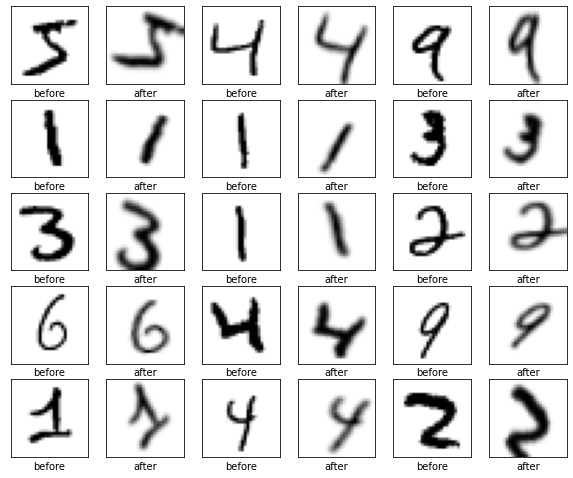

In [10]:
augmented_images = data_augmentation_layers(train_images_norm_4dim)
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    if(i%2 == 0):
        plt.imshow(train_images_norm_4dim[i], cmap=plt.cm.binary)
        plt.xlabel("before")
    else:
        plt.imshow(augmented_images[i-1], cmap=plt.cm.binary)
        plt.xlabel("after")

# build the model

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# complie the model

In [26]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
#     metrics=["accuracy"]
)

# fit

In [27]:
model.fit(
    augmented_images,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 2s 627us/step - loss: 1.1563 - sparse_categorical_accuracy: 0.6309
Epoch 2/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.4336 - sparse_categorical_accuracy: 0.8725
Epoch 3/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.3364 - sparse_categorical_accuracy: 0.8977
Epoch 4/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.2834 - sparse_categorical_accuracy: 0.9155
Epoch 5/5
1875/1875 [==============================] - 1s 577us/step - loss: 0.2558 - sparse_categorical_accuracy: 0.9237


# evaluate

In [28]:
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.1413 - sparse_categorical_accuracy: 0.9566


[0.14132046699523926, 0.95660001039505]

## prob model

In [29]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [31]:
prob_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
#     metrics=["accuracy"]
)

In [32]:
prob_model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.1413 - sparse_categorical_accuracy: 0.9566


[0.14132046699523926, 0.95660001039505]

# save and load the model

In [34]:
prob_model.save("../saved_models/augmented_model.h5")

In [35]:
loaded_model = tf.keras.models.load_model("../saved_models/augmented_model.h5")

In [36]:
loaded_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 443us/step - loss: 0.1413 - sparse_categorical_accuracy: 0.9566


[0.14132046699523926, 0.95660001039505]